In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Train (1).csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.size

102276

In [3]:
#getting the unique values 
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [4]:
#getting the number of duplicates
df.duplicated().sum()

0

In [5]:
#getting the number of null values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#DATA CLEANING
#getting only the object type columns
cat_cols =[]
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_cols.append(x)
display(cat_cols)
    

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [8]:
#removing item_identifier and outlet_identifier because it don't need any cleaning
cat_cols.remove('Item_Identifier')
cat_cols.remove('Outlet_Identifier')

In [9]:
display(cat_cols)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
#getting the unique value count
for col in cat_cols:
    print(col,len(df[col].unique()))

Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [11]:
#checking the value count of the column 
for col in cat_cols:
    print(col)
    print(df[col].value_counts(),'\n')
    print('-'*55)

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64 

-------------------------------------------------------
Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64 

-------------------------------------------------------
Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64 

-------------------------------------------------------
Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2  

In [12]:
#getting the null values from the item_weight for the null values treatment , 
miss_bool = df['Item_Weight'].isnull() #creating a boolean mask
Item_Weight_null = df[df['Item_Weight'].isnull()]
Item_Weight_null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [13]:
#identifing the unique value count of the item_idenfier from the item_weight null value dataset
Item_Weight_null['Item_Identifier'].value_counts()

Item_Identifier
FDK08    2
FDA08    2
FDV23    2
FDY56    2
FDI04    2
        ..
FDM44    1
FDZ48    1
FDK41    1
FDD57    1
NCN18    1
Name: count, Length: 1142, dtype: int64

In [14]:
#getting the mean of the item_weight with respect to item_identifier using pivote table funtion
item_weight_mean = df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [15]:
#filling the null values of the item_weight column with the mean value from the pivot table function with respect to item_identifier
for i , item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

C:\Users\adhithyan\AppData\Local\Temp\ipykernel_16192\1877465422.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Item_Weight'][i] = np.mean(df['Item_Weight'])
C:\Users\adhithyan\AppData\Local\Temp\ipykernel_16192\1877465422.py:7: Set

In [16]:
df['Item_Weight'].isna().sum()

0

In [17]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [18]:
df['Outlet_Size'].isnull().sum()

2410

In [19]:
outlet_size_null = df[df['Outlet_Size'].isna()]
outlet_size_null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [20]:
outlet_size_null['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [21]:
#grouping the outlet_type and outlet_size with aggragate function of size of the outlet_type
df.groupby(['Outlet_Type','Outlet_Size']).agg({'Outlet_Type':[np.size]})

Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [22]:
#getting the mean value by pivote table
outlet_size_mean = df.pivot_table(values = 'Outlet_Size',columns = 'Outlet_Type',aggfunc =(lambda x :x.mode()[0]))
outlet_size_mean

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [23]:
#filling the null values of outlet_size with the mean values from the pivot table
miss_bool = df['Outlet_Size'].isna()
df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x : outlet_size_mean[x])

In [24]:
df["Outlet_Size"].isna().sum()

0

In [25]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
#getting the count of item_visibility column with value =0
sum(df['Item_Visibility']==0)

526

In [27]:
#replacing the 0 values with the mean value of the item_vilisibility

    

In [28]:
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace = True)

C:\Users\adhithyan\AppData\Local\Temp\ipykernel_16192\2481586046.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace = True)


In [29]:
sum(df['Item_Visibility']==0)

0

In [30]:
#getting the unique value count from the item_fat_content
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [31]:
#in the item_fat_content column same category where typed in different name, for further process it need to currected and named under a single category
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'})

In [32]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [33]:
#adding new column new_item_type to the dataset by getting the first two character from the item_identifier  that represent the category of the item , and getting the count of the new_item_type column
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type'].value_counts()

New_Item_Type
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [34]:
#Replacing the code name of the new_item_type column with meaning full category name
df['New_Item_Type'] = df['New_Item_Type'].replace({'FD' : 'Food', 'NC' : 'Non-consumebles', 'DR' : 'Drinks'})
df['New_Item_Type'].value_counts()

New_Item_Type
Food               6125
Non-consumebles    1599
Drinks              799
Name: count, dtype: int64

In [35]:
#grouping the new_item_type and item_fat_content with aggrate function of the size of the outlet_type
df.groupby(['New_Item_Type','Item_Fat_Content']).agg({'Outlet_Type':[np.size]})

Outlet_Type
                                        size
New_Item_Type   Item_Fat_Content            
Drinks          Low Fat                  728
                Regular                   71
Food            Low Fat                 3190
                Regular                 2935
Non-consumebles Low Fat                 1599

In [36]:
#in the new_item_type column the non-consumebles is marked as low fat category , changing it to non-edible 
df.loc[df['New_Item_Type']=='Non-consumebles',"Item_Fat_Content"] = 'Non-edible'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-edible    1599
Name: count, dtype: int64

In [37]:
#getting all the unique values from the outlet_establish_year
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [38]:
#calculating the outlet establish year until current year and storing it as outlet_year
import datetime
curr_time = datetime.datetime.now()
df['Outlet_Year'] = df['Outlet_Establishment_Year'].apply(lambda x : curr_time.year - x)

In [39]:
df['Outlet_Year']

0       25
1       15
2       25
3       26
4       37
        ..
8518    37
8519    22
8520    20
8521    15
8522    27
Name: Outlet_Year, Length: 8523, dtype: int64

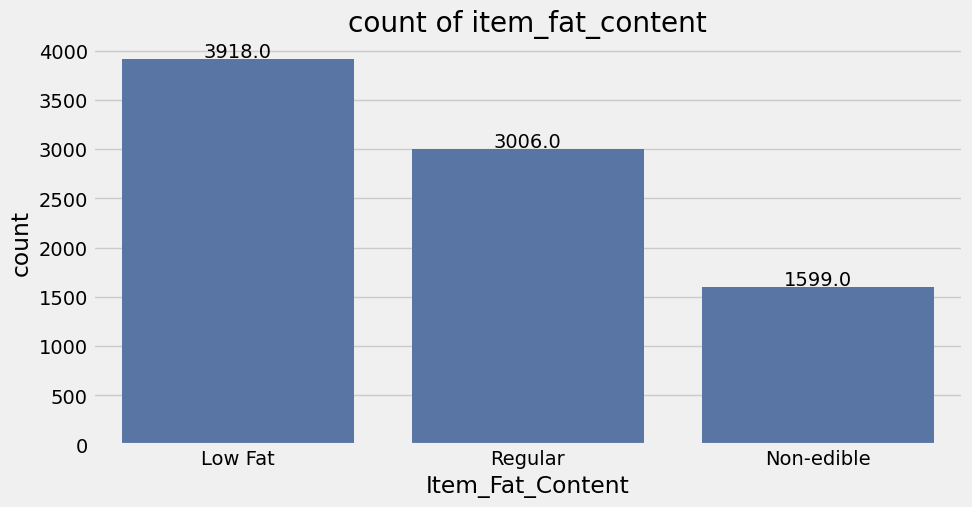

In [40]:
#VISUALIZATION
#plotting bar chart with the count of item_fat_content 
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']= 10,5 #setting the size of the figure 
plt.style.use('fivethirtyeight')  #setting the fivethirtyeight style
sns.set_palette('deep')
plot = sns.countplot(x = df['Item_Fat_Content']) #plotting with countplot with x as item_fat_content unique value and y as count of item_fat_content
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()), #placing the annotation as the center of the patches (bar)
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points') #placing the text center
plt.title('count of item_fat_content')
plt.savefig('count of item_fat_content.png')
plt.show()



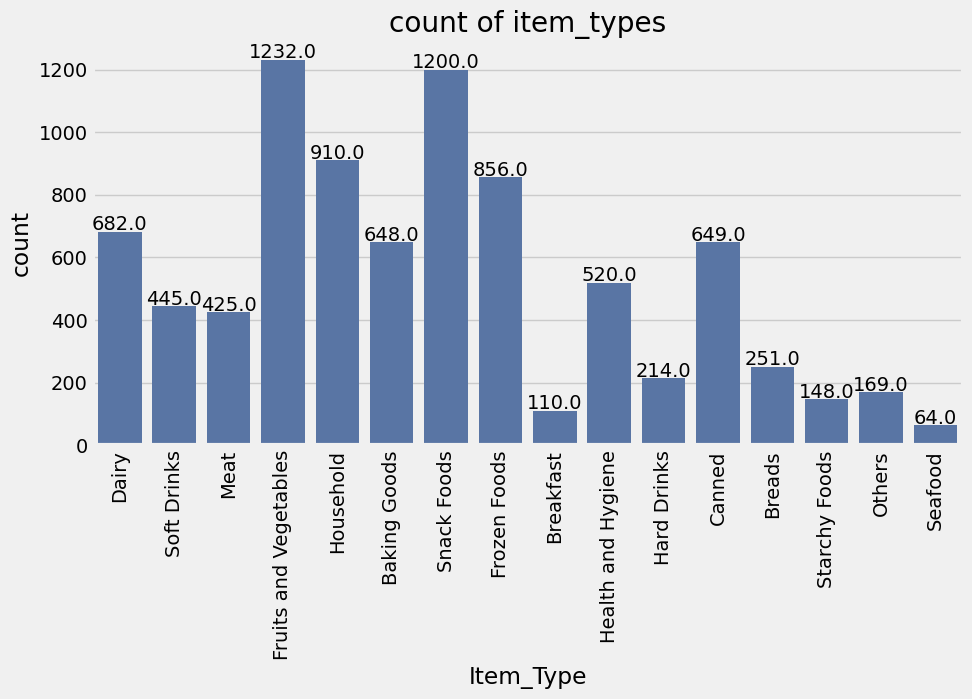

In [41]:
# plotting the bar graph with the count of item_type
plot = sns.countplot(x = df['Item_Type'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                  ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.xticks(rotation = 90)
plt.title('count of item_types')
plt.savefig('count of item_type.')
plt.show()

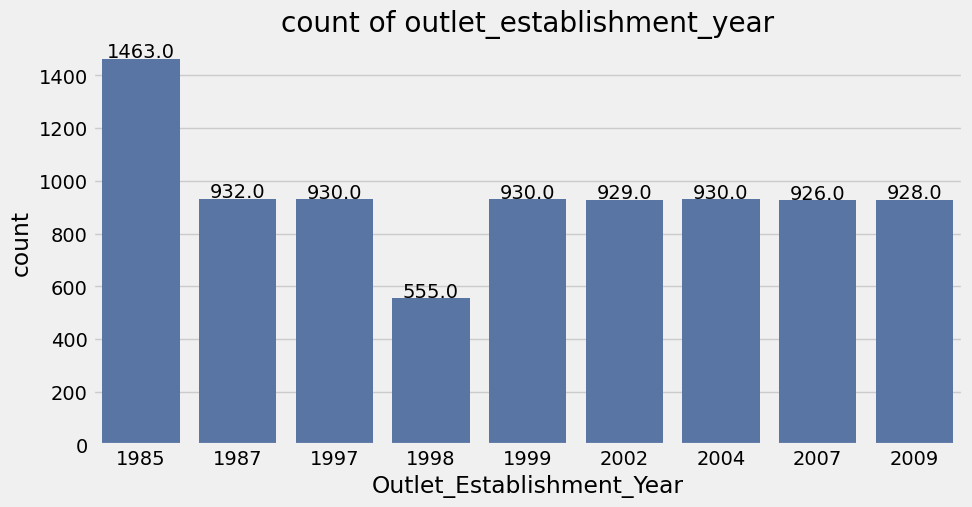

In [42]:
#plotting bar graph with count of outlet_establishment_year
plot = sns.countplot(x = df['Outlet_Establishment_Year'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0, p.get_height()),
                 ha = 'center', va = 'center', xytext = (0,5),textcoords ='offset points')
plt.title('count of outlet_establishment_year')
plt.savefig('count of outlet_establishment_year.png')
plt.show()

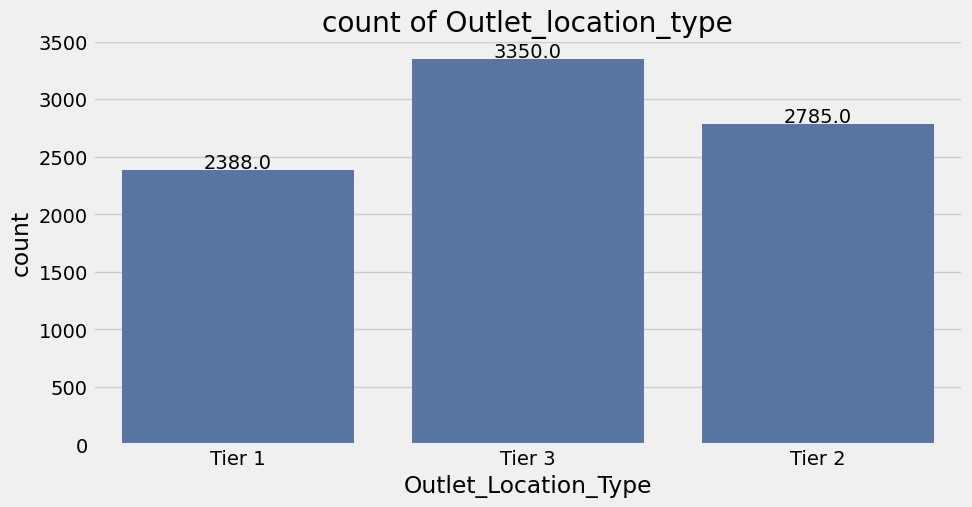

In [43]:
#plotting bar graph with count of outlet_location_type
plot = sns.countplot(x = df['Outlet_Location_Type'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0, p.get_height()),
                 ha = 'center', va = 'center', xytext = (0,5), textcoords = 'offset points')
plt.title('count of Outlet_location_type')
plt.savefig('count of outlet_location_type.png')
plt.show()

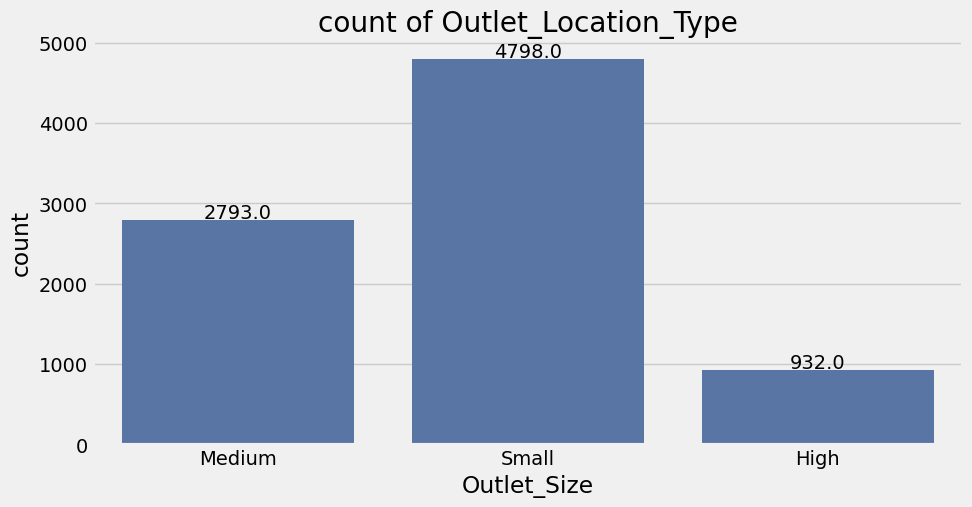

In [44]:
#plotting bar graph with count outlet_size
plot = sns.countplot(x = df['Outlet_Size'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0 , p.get_height()),
                 ha = 'center', va = 'center', xytext = (0,5), textcoords = 'offset points')
plt.title('count of Outlet_Location_Type')
plt.savefig('count of Outlet_Location_Type.png')
plt.show()

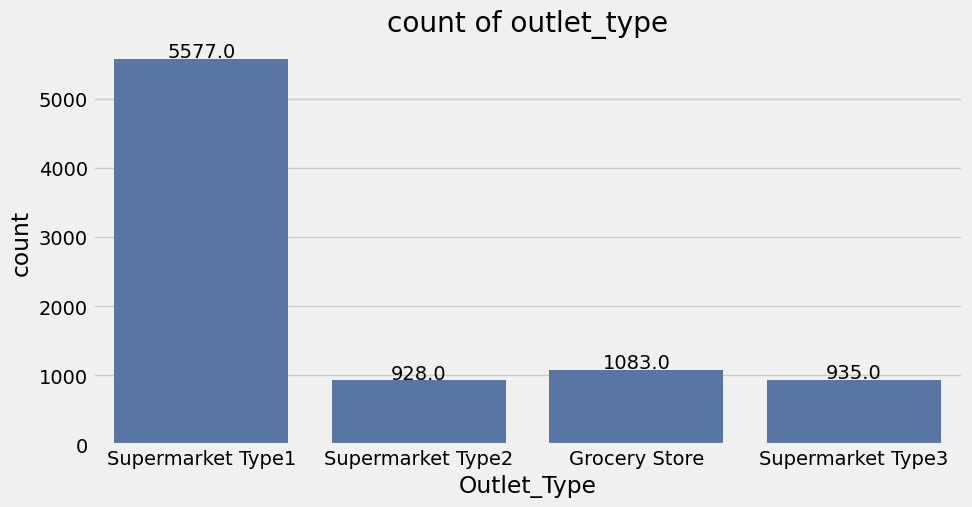

In [45]:
#plotting bar graph of count of Outlet_type
plot = sns.countplot(x = df['Outlet_Type'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0 , p.get_height()),
                 ha ='center', va ='center',xytext = (0,5), textcoords ='offset points')
plt.title('count of outlet_type')
plt.savefig('count of outlet_type.png')
plt.show()

C:\Users\adhithyan\AppData\Local\Temp\ipykernel_16192\3103952318.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'], bins = 20)


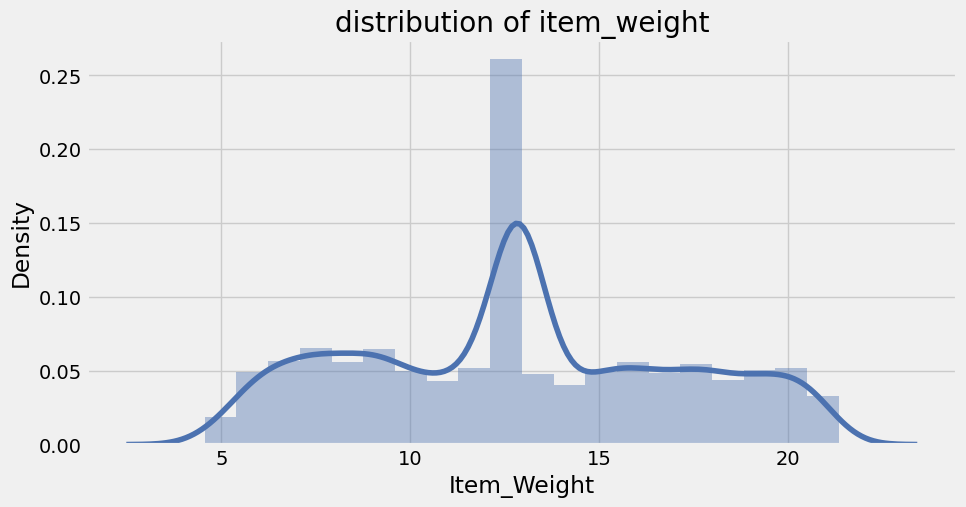

In [46]:
#vizualising the data distribution of item_weight against the density distribution
sns.distplot(df['Item_Weight'], bins = 20)
plt.title('distribution of item_weight')
plt.savefig('distribution of item_weight.png')
plt.show()

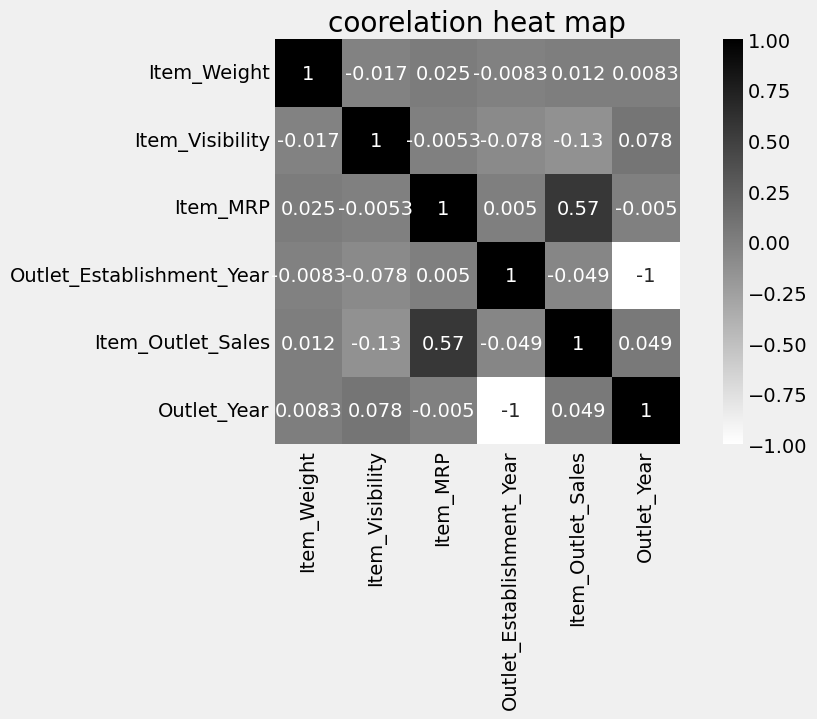

In [47]:
# getting the correlation value from  all the numeric column from the dataset using the heat map
numeric_value = df.select_dtypes(include =['float64','int64'])
corr_matrix = numeric_value.corr()
sns.heatmap(corr_matrix,cmap = 'binary', cbar = True, annot = True, square = True)
plt.title('coorelation heat map')
plt.savefig('C:/Users/adhithyan/Pictures/project/coorelation heat map.png')
plt.show()

In [48]:
#DATA PREPROCESSING
#Label encoding the outlet_identifier column and adding it to the dataset
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Outlet'] = encoder.fit_transform(df['Outlet_Identifier'])#encoded column as Outlet

In [49]:
#getting dtypes to identify 'Object' type
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
New_Item_Type                 object
Outlet_Year                    int64
Outlet                         int32
dtype: object

In [50]:
#adding all the necessary object type columns for label encoding
cols = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for c in cols:
    df[c] = encoder.fit_transform(df[c])

In [51]:
#One hot encoding the item_fat_content, item_type, Outlet_size, Outlet_location_type, outlet_type, new_item_type
df = pd.get_dummies(df,columns = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type'])

In [52]:
#Assinging x and y
x = df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'],axis = 1)
y = df['Item_Outlet_Sales']

In [53]:
x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Year,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_0,Item_Type_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.300,0.016047,249.8092,25,9,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,5.920,0.019278,48.2692,15,3,False,False,True,False,False,...,False,False,True,False,False,True,False,True,False,False
2,17.500,0.016760,141.6180,25,9,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,19.200,0.066132,182.0950,26,0,False,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False
4,8.930,0.066132,53.8614,37,1,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,37,1,True,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
8519,8.380,0.046982,108.1570,22,7,False,False,True,True,False,...,False,True,False,False,True,False,False,False,True,False
8520,10.600,0.035186,85.1224,20,6,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
8521,7.210,0.145221,103.1332,15,3,False,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False


In [140]:
#Model fitting
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 10)

In [55]:
x_train.shape

(5966, 37)

In [56]:
y_train.shape

(5966,)

In [57]:
x_test.shape

(2557, 37)

In [58]:
y_test.shape

(2557,)

In [59]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score

In [60]:
def train(model,x,y):
    model.fit(x,y)
    pred = model.predict(x)
    cv_score = cross_val_score(model,x,y,scoring ='neg_mean_squared_error',cv = 10)#validating with neg_mean_squared_err0r
    print('model report :\n')
    print('scoring - negative mean squared error \n')
    print(cv_score,'\n')
    cv_score =  np.abs(np.mean(cv_score))#finding the absolute mean of the score
    print('Average scoring', cv_score)
    cv_score = cross_val_score(model,x,y,cv = 10)#find the r2 score
    print('model report :\n')
    print('scoring - r2 scoring \n')
    print(cv_score,'\n')
    cv_score = np.mean(cv_score)#finding the mean of the r2 score
    print('Average scoring',cv_score,'\n')
    print('Accuracy for full data: \n')
    print('R2 score:',r2_score(y,pred),'\n')#find the accuracy of the model's prediction on the full training dataset
    coef = pd.Series(model.coef_,x.columns).sort_values()#find the coefficient of the model and creating a series
    print(coef)
    coef.plot(kind ='bar',title = 'Model coefficients')#ploting graph with the coefficient
    plt.show()

model report :

scoring - negative mean squared error 

[-1304818.39860255 -1330232.65871156 -1292706.36734024 -1373085.98259793
 -1201460.96471188 -1315051.73170533 -1229146.72803449 -1378167.59835383
 -1142745.18803243 -1307653.7005158 ] 

Average scoring 1287506.9318606039
model report :

scoring - r2 scoring 

[0.54415424 0.54178842 0.57426572 0.5751042  0.62458967 0.51659514
 0.57212194 0.50360694 0.57761245 0.52989375] 

Average scoring 0.555973245927622 

Accuracy for full data: 

R2 score: 0.5633515496986637 

Outlet_Type_1            -2071.183621
Outlet_Size_1            -1965.032398
Outlet_Size_2            -1486.839139
Outlet_Type_2            -1404.039632
Outlet_Type_0            -1034.352992
Outlet_Location_Type_2    -978.570826
Item_Type_14              -243.953055
Outlet_Year               -190.467393
Item_Visibility           -170.870120
Item_Type_7               -153.732726
Item_Type_4                -89.969742
New_Item_Type_1            -50.215872
Item_Fat_Content_1  

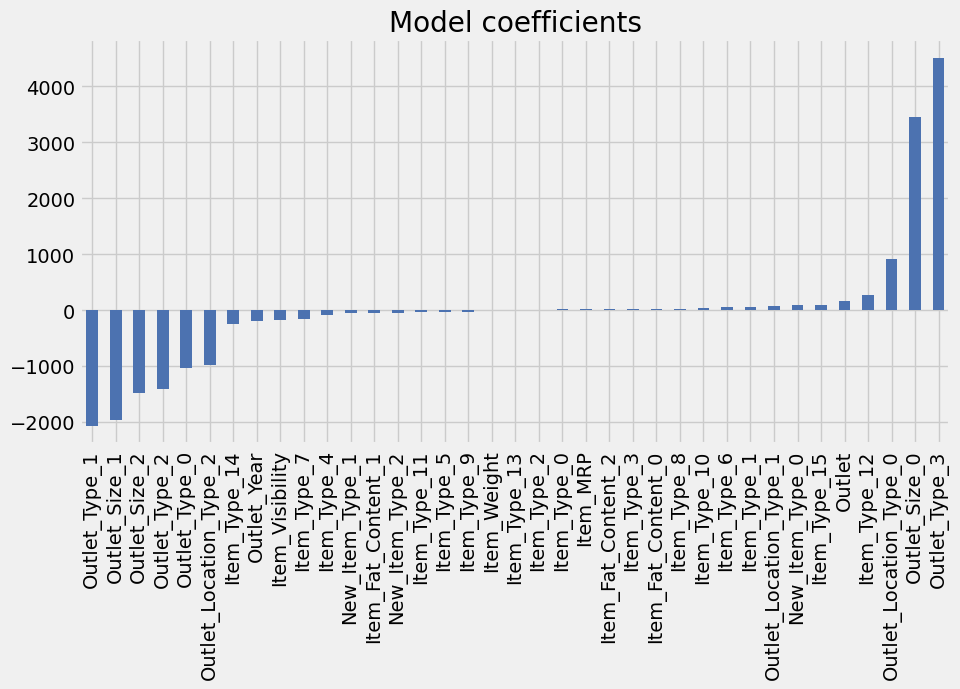

In [61]:
model = LinearRegression()
train(model,x_train,y_train)

model report :

scoring - negative mean squared error 

[-1308210.17107092 -1330308.04434132 -1288783.02313871 -1371879.07445289
 -1201457.20965925 -1314192.90651708 -1229409.95526984 -1383698.60075142
 -1144633.79947191 -1314037.89610878] 

Average scoring 1288661.0680782124
model report :

scoring - r2 scoring 

[0.5429693  0.54176245 0.57555782 0.57547767 0.62459084 0.51691083
 0.57203031 0.50161476 0.57691437 0.52759861] 

Average scoring 0.555542697161916 

Accuracy for full data: 

R2 score: 0.5628642503609557 

Outlet_Type_0            -1595.023413
Outlet_Size_1             -388.602317
Outlet_Type_2             -361.496515
Outlet_Size_2             -351.275515
Outlet_Type_1             -292.995007
Outlet_Location_Type_2    -274.560558
Item_Type_14              -235.002274
Item_Visibility           -166.065453
Item_Type_7               -151.333852
Item_Type_4                -88.379515
New_Item_Type_1            -46.966204
New_Item_Type_2            -43.767651
Item_Fat_Content_1  

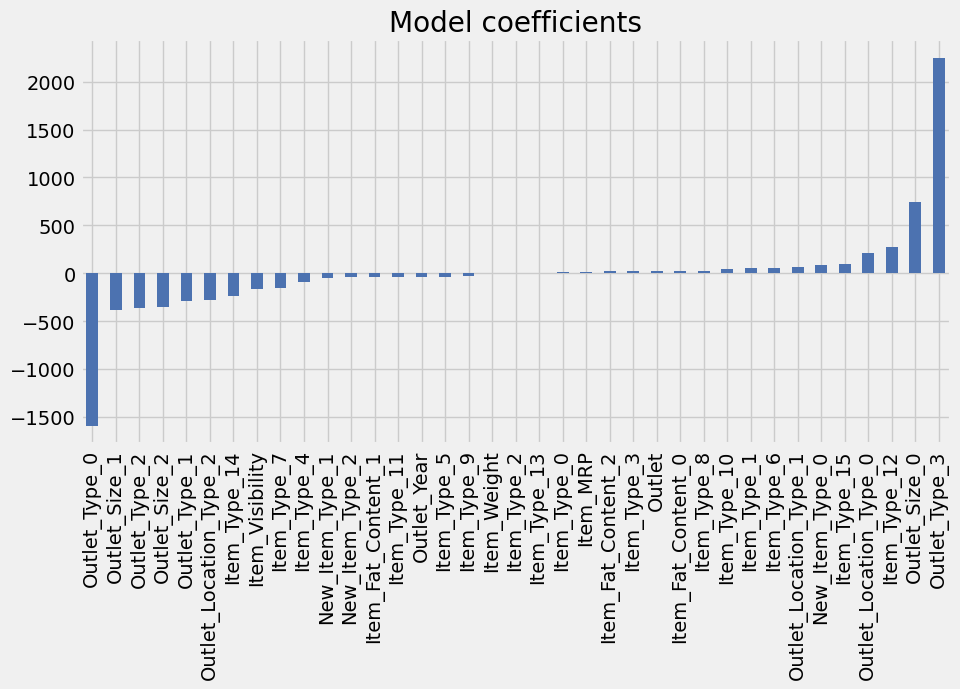

In [62]:
model = Ridge()
train(model , x_train, y_train)

model report :

scoring - negative mean squared error 

[-1308333.42467252 -1326995.18587542 -1282808.67117928 -1371171.28900125
 -1204728.7294212  -1311087.26989888 -1227888.1137496  -1380842.50105701
 -1144284.97928548 -1314827.80358278] 

Average scoring 1287296.7967723436
model report :

scoring - r2 scoring 

[0.54292624 0.5429036  0.57752539 0.57569669 0.62356862 0.51805245
 0.57256008 0.50264348 0.5770433  0.52731464] 

Average scoring 0.5560234481398816 

Accuracy for full data: 

R2 score: 0.5622710605747782 

Outlet_Type_0            -1928.887453
Outlet_Type_2             -241.537074
Item_Type_14               -85.819050
Outlet_Location_Type_2     -84.713395
Item_Fat_Content_1         -60.230079
Item_Type_4                -59.748710
Outlet_Size_2              -51.269272
Item_Type_5                -36.493327
Item_Type_9                -27.640633
Outlet                      -9.804087
New_Item_Type_2             -2.099989
Outlet_Year                 -1.530246
Item_Type_11       

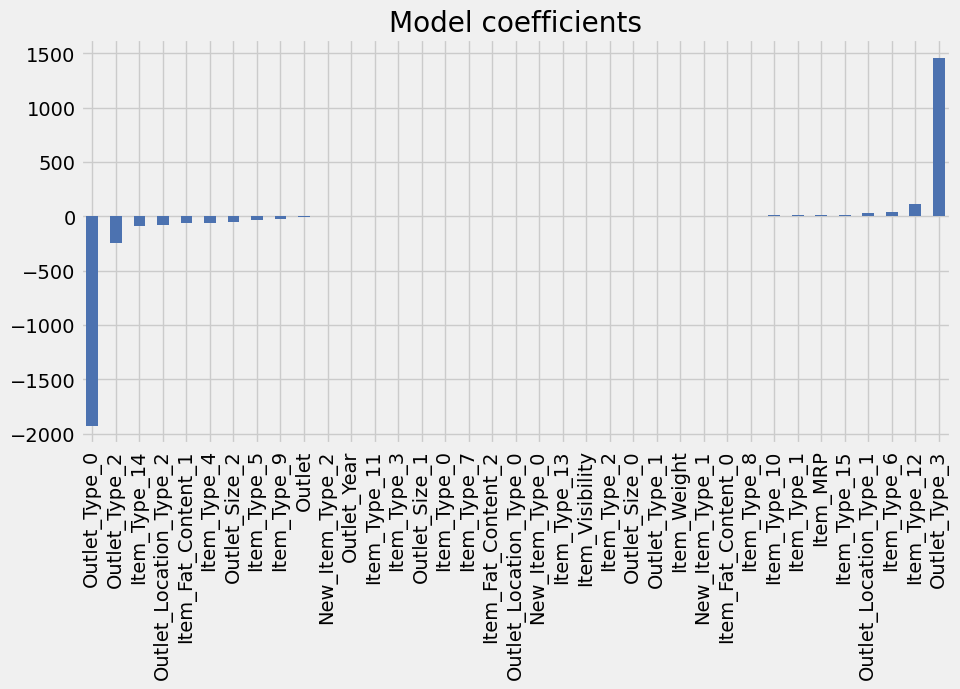

In [63]:
model =Lasso()
train(model,x_train,y_train)

In [64]:
def train(model,x,y):
    model.fit(x,y)
    pred = model.predict(x)
    cv_score = cross_val_score(model,x,y,scoring = 'neg_mean_squared_error',cv = 10)#validating with neg_mean_squared_error scoring
    print('model report :\n')
    print('scoring - neg_mean_squared_error \n') #printing the score
    print(cv_score ,'\n')
    cv_score = np.abs(np.mean(cv_score))#find the absolute mean of the score
    print('Average scoring ',cv_score,'\n')
    cv_score = cross_val_score(model,x,y,cv=10)#measure how well the model explains the variance in the target data , using R2 scoring
    print('model report : \n')
    print('scoring - R2 score \n')
    print(cv_score,'\n')
    cv_score = np.mean(cv_score)#find the mean of the r2 score
    print('Average scoring',cv_score,'\n')
    print('Accuracy for full data \n')
    print('R2 score:', r2_score(y,pred),'\n')#find how well the model performs on the training data without validations
    coef = pd.Series(model.feature_importances_,x.columns).sort_values(ascending = False)#find the coefficient of the model and creating a series
    print(coef)
    coef.plot(kind = 'bar',title = 'feature importance')#ploting with the coefficient
    plt.plot
    

model report :

scoring - neg_mean_squared_error 

[-2522938.62962244 -2629770.33763259 -2376164.7771357  -2190584.65084385
 -2261128.16251902 -2414602.21613965 -2294444.06682053 -2481992.19163701
 -2186066.14927688 -2249147.00733589] 

Average scoring  2360683.818896355 

model report : 

scoring - R2 score 

[0.09068729 0.09852234 0.23806675 0.29338642 0.29864811 0.08686193
 0.23525889 0.1188216  0.19386463 0.19649218] 

Average scoring 0.1850610139569459 

Accuracy for full data 

R2 score: 1.0 

Item_MRP                  0.434322
Outlet_Type_0             0.204179
Item_Visibility           0.109563
Outlet_Year               0.095096
Item_Weight               0.048231
Outlet                    0.013079
Item_Type_6               0.009151
Item_Type_13              0.007359
Item_Fat_Content_0        0.007305
Item_Type_3               0.006266
Item_Type_8               0.005158
Item_Fat_Content_2        0.005135
Item_Type_0               0.004962
Item_Type_4               0.004682
Outle

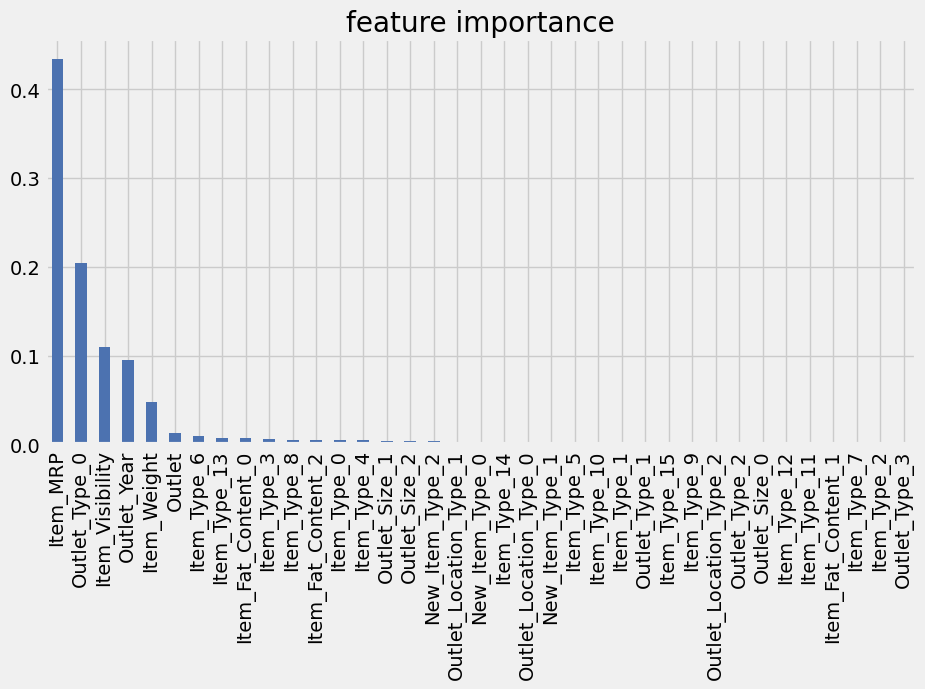

In [65]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,x_train,y_train)

model report :

scoring - neg_mean_squared_error 

[-1262504.03815807 -1342544.19747972 -1256523.07498685 -1333565.60381905
 -1201815.48762299 -1454812.3458309  -1158039.68137584 -1452224.93448545
 -1129588.21821401 -1404416.32091747] 

Average scoring  1299603.390289036 

model report : 

scoring - R2 score 

[0.56620639 0.53818651 0.58506104 0.59170801 0.61286136 0.46354435
 0.58324302 0.48393384 0.58687259 0.48280053] 

Average scoring 0.5494417632805086 

Accuracy for full data 

R2 score: 0.93699209372788 

Item_MRP                  0.438379
Outlet_Type_0             0.200947
Item_Visibility           0.096186
Outlet_Year               0.058247
Item_Weight               0.051607
Outlet_Type_3             0.033892
Outlet                    0.015986
Item_Type_6               0.008917
Item_Type_13              0.006797
Item_Fat_Content_0        0.006374
Item_Type_4               0.005995
Item_Fat_Content_2        0.005969
Item_Type_5               0.005217
Item_Type_0               0

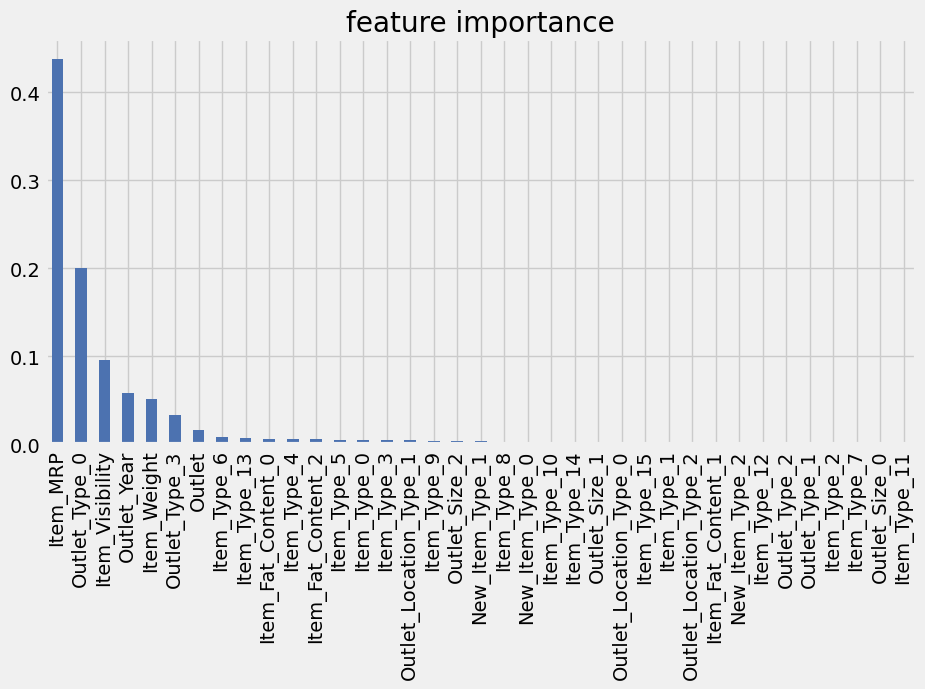

In [66]:
model = RandomForestRegressor()
train(model,x_train,y_train)

model report :

scoring - neg_mean_squared_error 

[-1447190.54033211 -1530876.9088184  -1461980.23740536 -1465066.25791534
 -1322510.45142237 -1613768.38845746 -1304914.84368238 -1575075.51020944
 -1275631.94549006 -1573346.50212093] 

Average scoring  1457036.1585853838 

model report : 

scoring - R2 score 

[0.49055343 0.46368911 0.51413251 0.53986132 0.5921674  0.41811478
 0.55306588 0.43104842 0.52733993 0.43799832] 

Average scoring 0.4967971098013496 

Accuracy for full data 

R2 score: 0.9999999088875169 

Item_MRP                  0.423157
Outlet_Type_0             0.181607
Outlet_Type_3             0.072145
Item_Visibility           0.071007
Item_Weight               0.044968
Outlet_Year               0.019074
Outlet                    0.017632
Item_Type_6               0.012709
Item_Type_13              0.011057
Item_Fat_Content_0        0.011036
Item_Fat_Content_2        0.010783
Item_Type_4               0.009431
Item_Type_0               0.008566
Item_Type_3             

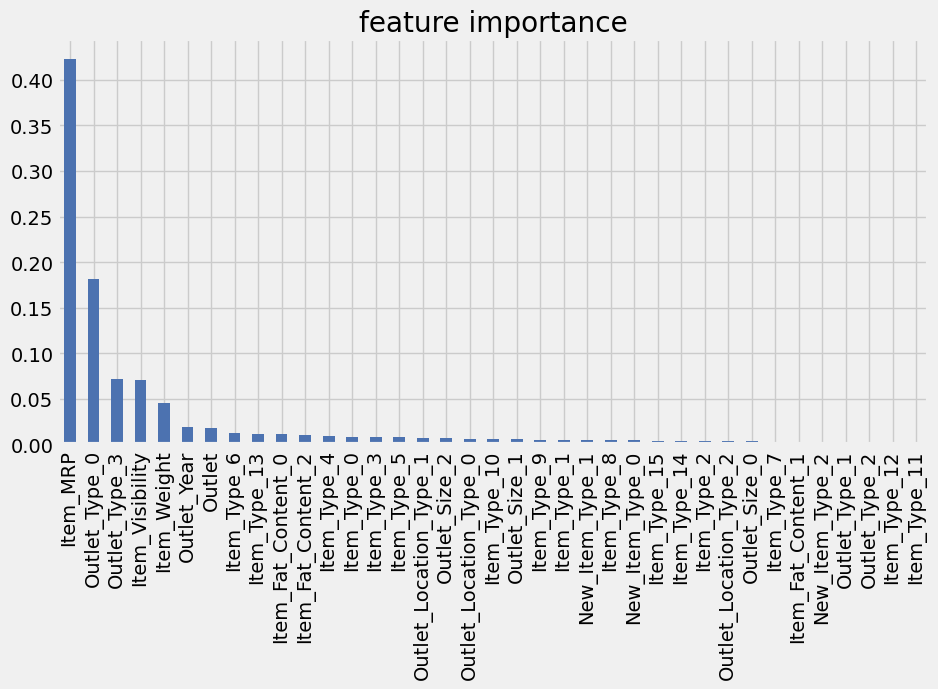

In [67]:
model = ExtraTreesRegressor()
train(model,x_train,y_train)


In [154]:
#setting hyperparameters
random_grid = {
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],#Generating list of integers from 5 to 30 
               'min_samples_split':[2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10]
}

In [158]:
RF = RandomForestRegressor()
RF = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter =10,
                       verbose = 0, cv =10, random_state = 10, n_jobs = 1)
RF.fit(x_train, y_train)
print('Best Params : ',RF.best_params_,'\n')
print('Best Score : ',RF.best_score_,'\n')
prediction = RF.predict(x_test)
print('R2 Score : ',r2_score(y_test,prediction))

C:\Users\adhithyan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\adhithyan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adhithyan\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\adhithyan\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\adhithyan\anacond

Best Params :  {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15} 

Best Score :  -1239679.6698352073 

R2 Score :  0.5703440828234283


C:\Users\adhithyan\AppData\Local\Temp\ipykernel_16192\3354484248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


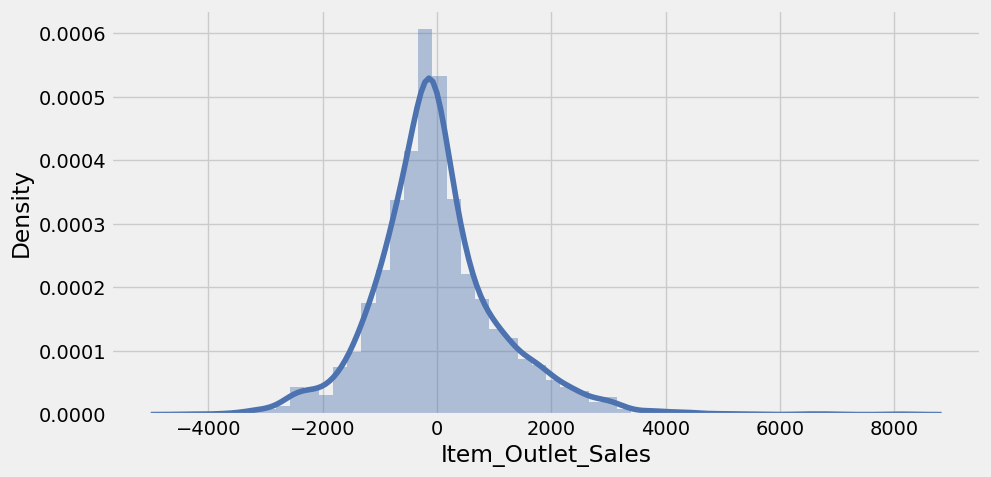

In [160]:
sns.distplot(y_test-prediction)
plt.show()

NameError: name 'cat' is not defined